# plots of OCT results

In [138]:
# creat folders
# for i in range(1, 11):
#     os.mkdir(f"./{i}")

# for paper in ["l90", "l130", "l200", "l250", "o73", "o84", "o104", "o128"]:
#     for i in range(1, 4):
#         if not os.path.exists(f"./{paper}/{i}"):
#             os.makedirs(f"./{paper}/{i}")

In [139]:
# import os

# # print(os.getcwd())
# os.chdir("./l90/1/")
# print(os.getcwd())

In [46]:
# make data
import pandas as pd
import os
import glob
import re

paper = "o73"
num = 1

path = f"C:/Users/kakum/Desktop/02_Research/00_Experimental Data/20210629_pg25_all/{paper}"
csv_all = sorted(glob.glob(path + f"/{num}" + "/image*.csv"))

# print(csv_all)
# print(re.split("[_.]", csv_all[0]))
start = int(re.split("[_.]", csv_all[0])[-2])
end = int(re.split("[_.]", csv_all[-1])[-2])
start_ratio = 0.1
end_ratio = 0.6
# end = 1000

csv_range = [i for i in range(int(start+start_ratio*(end-start)), 
                              int(start+end_ratio*(end-start)))]

csv_list = ["{}/{}/image_{:0>5d}.csv".format(path, num, i) for i in csv_range]

for i, csv in enumerate(csv_list):
    df = pd.read_csv(csv, header=None)
#     df = df.iloc[:, 50: 70] # select column from 100th-150th
    df = df.iloc[::-1] # reverse rows
    if i == 0:
        recorder = df
    else:
        recorder = pd.concat([recorder, df], axis=1, ignore_index=False)
#         print(recorder.head())

recorder = recorder.drop(labels=range(151, 251), axis=0) # delete pixels range from 100-250 in y directrion
recorder = recorder.drop(labels=range(20), axis=0)
# print()

# recorder.to_csv("test.csv", index=False)

In [47]:
# recorder

In [48]:
time_data = pd.read_csv(f"{path}/{num}/time.csv", header=None)
# time_data.head()

In [49]:
recorder.columns = [f"{time_data[0][i-1] - time_data[0][int(start+start_ratio*(end-start))-1]:.2f}" for i in csv_range]
# recorder

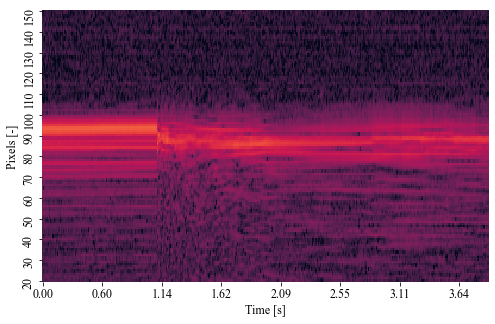

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 12} 

sns.set_context({"figure.figsize":(10, 5)})
# cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
heat_map = sns.heatmap(data=recorder, vmin=30, vmax=100, yticklabels=10, xticklabels=50, cbar=False)
ax.set_xlabel("Time [s]", font)
ax.set_ylabel("Pixels [-]", font)
plt.tick_params(labelsize=12)
tick_labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in tick_labels]


# save fig
# fig = heat_map.get_figure()
# plt.show()
fig.savefig("o73_nice.png", dpi=500)  
# plt.xlabel()
# fig.savefig(f"{path}/{paper}_{num}.png", dpi=500)